### Dataset 2

In [1]:
import pandas as pd
import numpy as np
import requests
from io import BytesIO
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

In [2]:
train_url = 'https://raw.githubusercontent.com/viswa3024/aiml-capstone-project-email/main/question-answering/Dataset-2/train.csv'
train_df = pd.read_csv(train_url)

In [3]:
train_df.head()

,question,answer
0,What is the role of Siamese networks in domain...,Siamese networks can be used to align the repr...
1,What is a recurrent neural network (RNN)?,"An RNN handles sequence data, capturing tempor..."
2,What are Eigen values and Eigen vectors in the...,Eigen values represent the variance captured b...
3,What are Deep Q-Networks?,Deep Q-networks are neural networks that appro...
4,What properties of words can Word2Vec extract?,Word2Vec can extract and provide the most simi...


In [4]:
train_df.shape

(1985, 2)

In [5]:
dev_url = 'https://raw.githubusercontent.com/viswa3024/aiml-capstone-project-email/main/question-answering/Dataset-2/dev.csv'
dev_df = pd.read_csv(dev_url)

In [6]:
dev_df.head()

,question,answer
0,How do U-Nets skip connections contribute to b...,Skip connections in U-Net preserve fine-graine...
1,Explain LSTM and its significance.,LSTM (Long Short-Term Memory) is a type of RNN...
2,How are N-Grams used?,N-Grams can be used to capture context and rel...
3,What is a token in NLP?,"A unit of text, such as a word or punctuation ..."
4,Does BoW give an ordered document representation?,No.


In [7]:
dev_df.shape

(248, 2)

In [8]:
test_url = 'https://raw.githubusercontent.com/viswa3024/aiml-capstone-project-email/main/question-answering/Dataset-2/test.csv'
test_df = pd.read_csv(test_url)

In [9]:
test_df.head()

,question,answer
0,What is feature selection?,The process of selecting a subset of relevant ...
1,"What are Markov decision processes (MDP), and ...",MDPs are mathematical frameworks for modeling ...
2,What is batch normalization and how does it work?,Normalizes the layer's input over a mini-batch
3,How does Word2Vec create word embeddings?,Word2Vec creates word embeddings by training o...
4,What is the role of hidden layers in MLP?,Hidden layers in MLP help capture complex patt...


In [10]:
test_df.shape

(249, 2)

In [11]:
combined_df = pd.concat([train_df, dev_df, test_df])

In [12]:
combined_df['question_word_count'] = combined_df['question'].apply(lambda x: len(x.split()))
combined_df['answer_word_count'] = combined_df['answer'].apply(lambda x: len(x.split()))

In [13]:
sns.set(style="whitegrid")

### combined Question Word Count Distribution

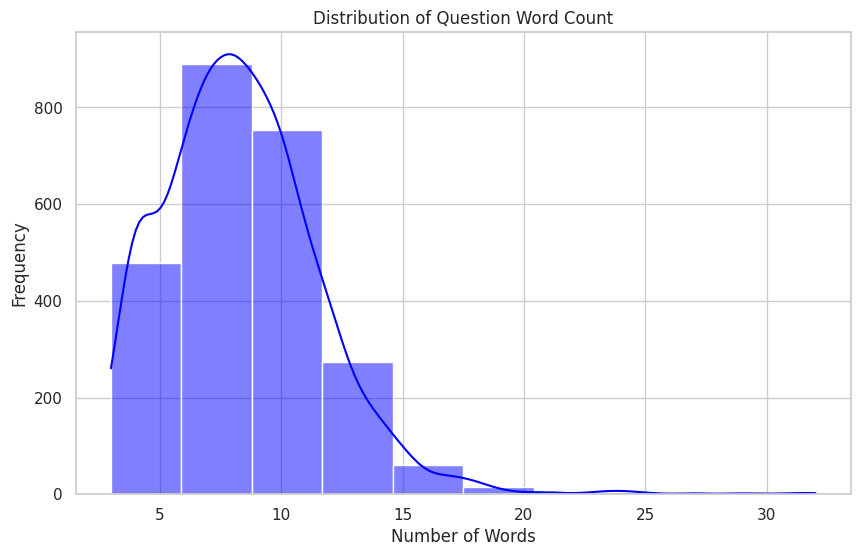

In [14]:
#KDE:  Kernel Density Estimate: Smooths the data into a continuous curve, giving you an idea of the probability distribution.
#It's helpful for seeing the overall shape of the distribution.
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['question_word_count'], bins=10, kde=True, color="blue")
plt.title('Distribution of Question Word Count')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

### combined Answer Word Count Distribution

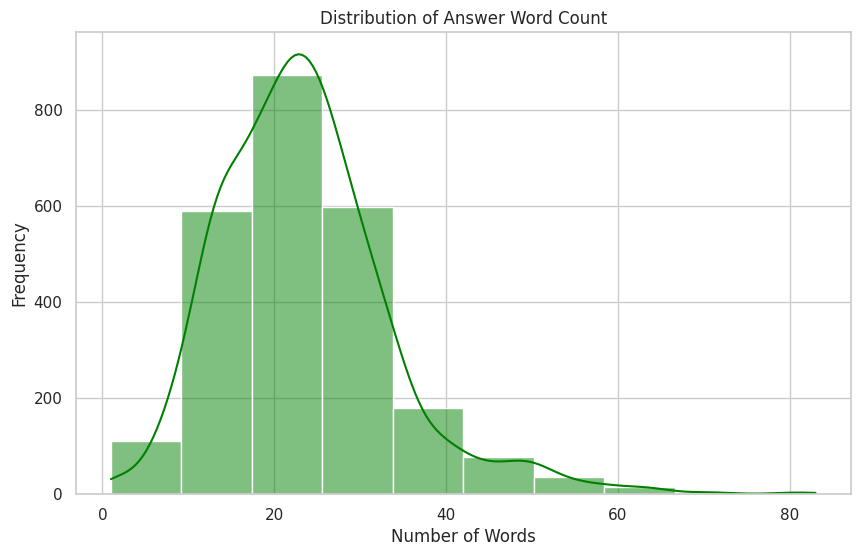

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['answer_word_count'], bins=10, kde=True, color="green")
plt.title('Distribution of Answer Word Count')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Add word counts for questions and answers
for df in [train_df, dev_df, test_df]:
    df['question_word_count'] = df['question'].apply(lambda x: len(x.split()))
    df['answer_word_count'] = df['answer'].apply(lambda x: len(x.split()))

In [17]:
# Helper function to clean and tokenize text
def clean_and_tokenize(text):
    tokens = nltk.word_tokenize(text.lower())  # Tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return tokens

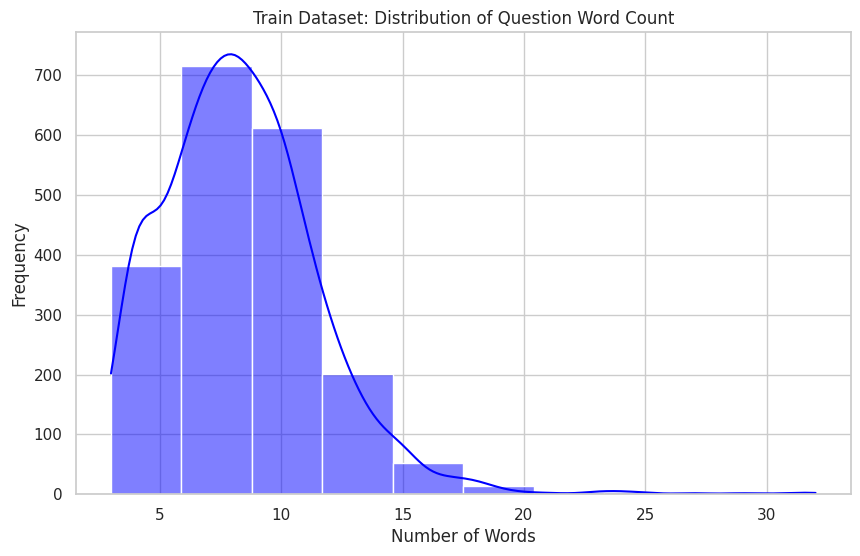

In [18]:
# Question Word Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['question_word_count'], bins=10, kde=True, color="blue")
plt.title('Train Dataset: Distribution of Question Word Count')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

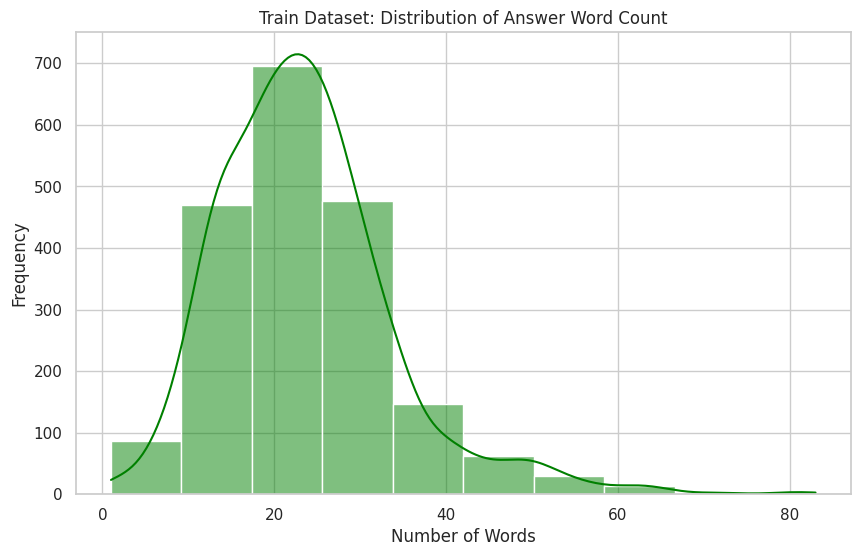

In [19]:
# Answer Word Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['answer_word_count'], bins=10, kde=True, color="green")
plt.title('Train Dataset: Distribution of Answer Word Count')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

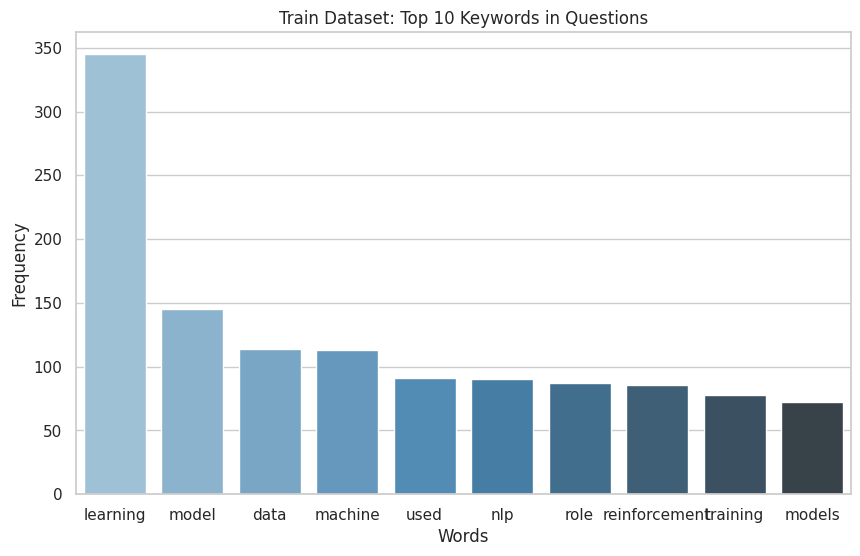

In [28]:
# Top Keywords in Questions
train_question_words = train_df['question'].apply(clean_and_tokenize).sum()
train_question_word_freq = Counter(train_question_words).most_common(10)

train_question_word_freq_df = pd.DataFrame(train_question_word_freq, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=train_question_word_freq_df, hue='Word', dodge=False, palette='Blues_d')
plt.title('Train Dataset: Top 10 Keywords in Questions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

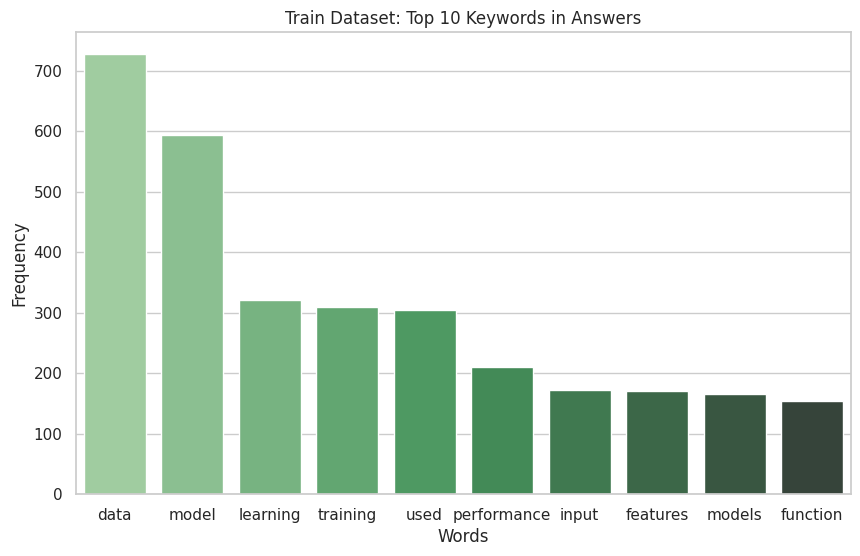

In [29]:
# 4. Top Keywords in Answers
train_answer_words = train_df['answer'].apply(clean_and_tokenize).sum()
train_answer_word_freq = Counter(train_answer_words).most_common(10)

train_answer_word_freq_df = pd.DataFrame(train_answer_word_freq, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=train_answer_word_freq_df, hue='Word', dodge=False, palette='Greens_d')
plt.title('Train Dataset: Top 10 Keywords in Answers')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

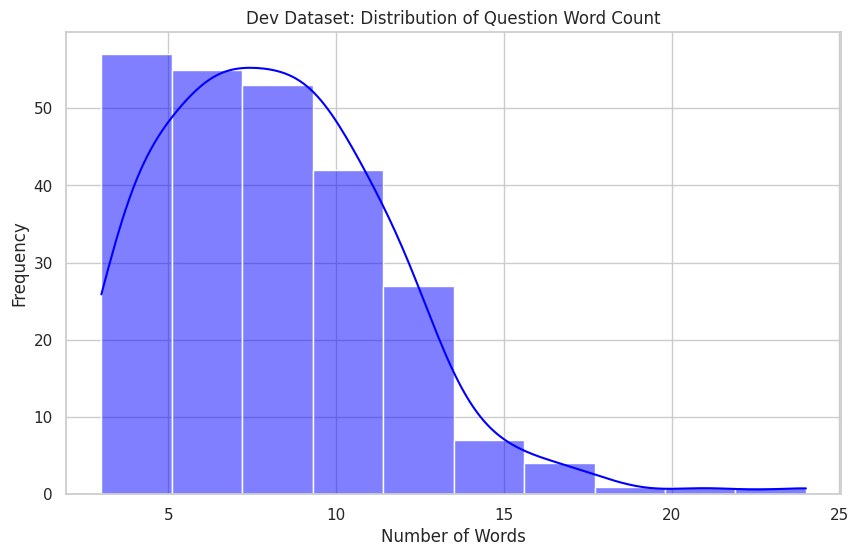

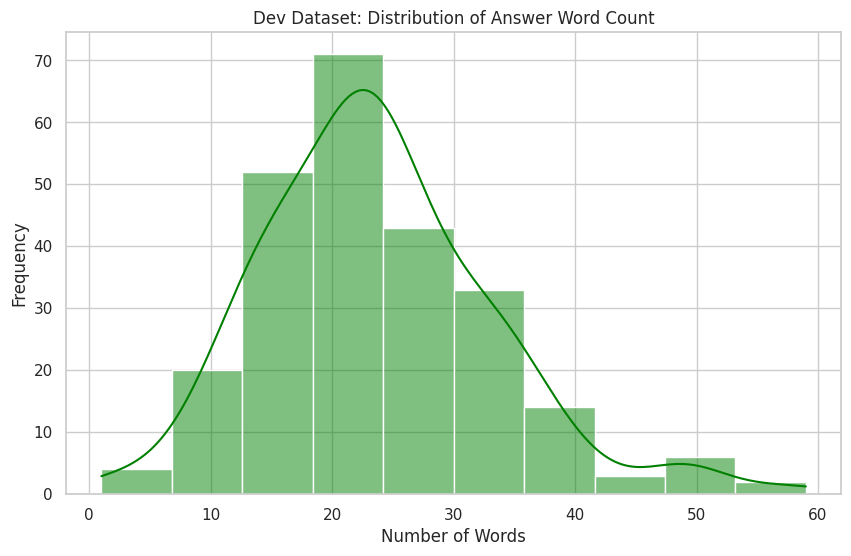

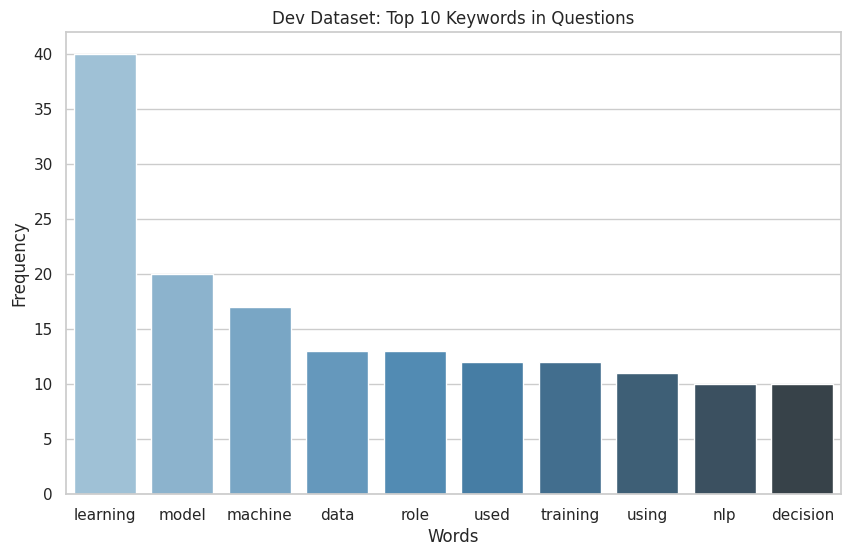

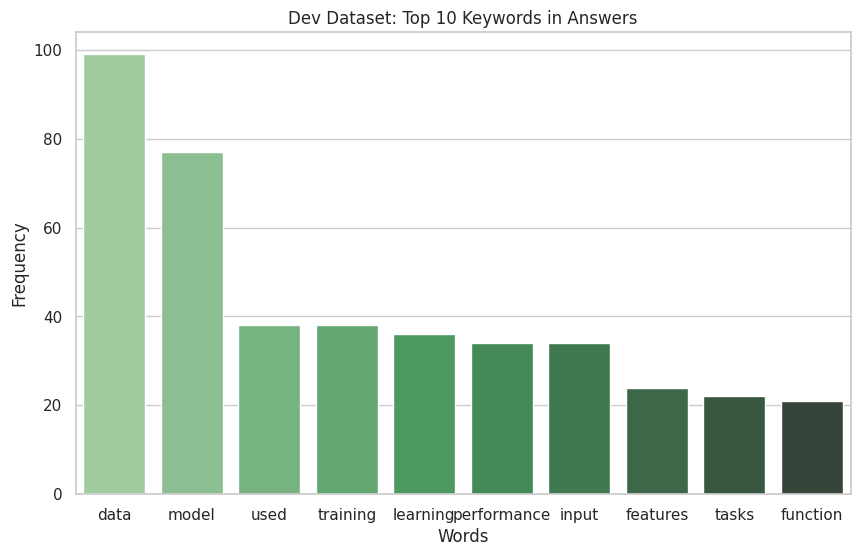

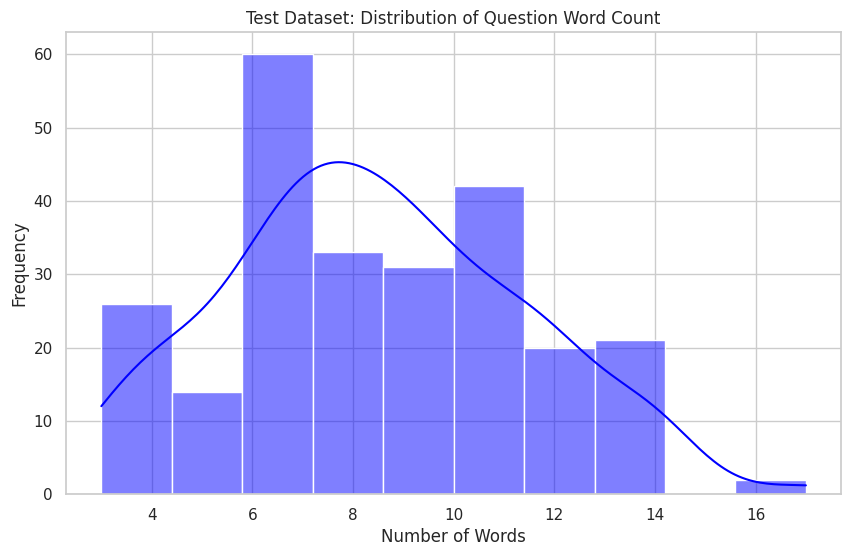

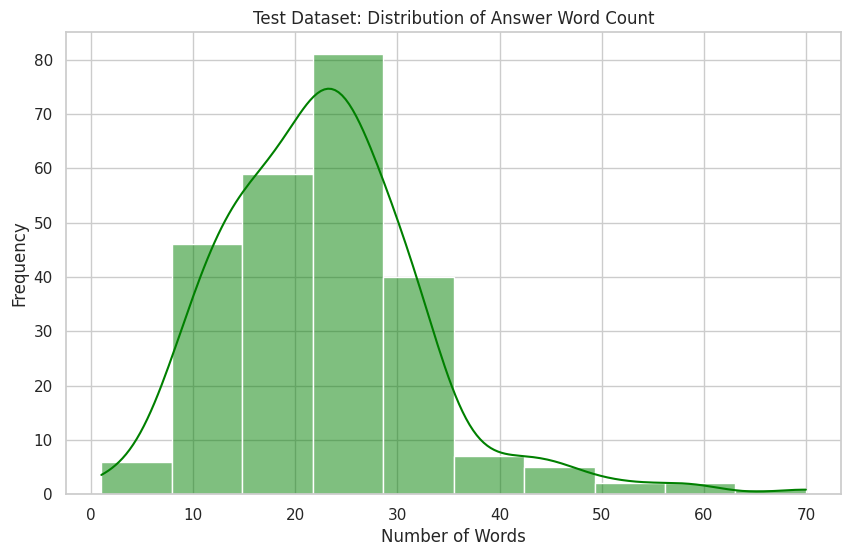

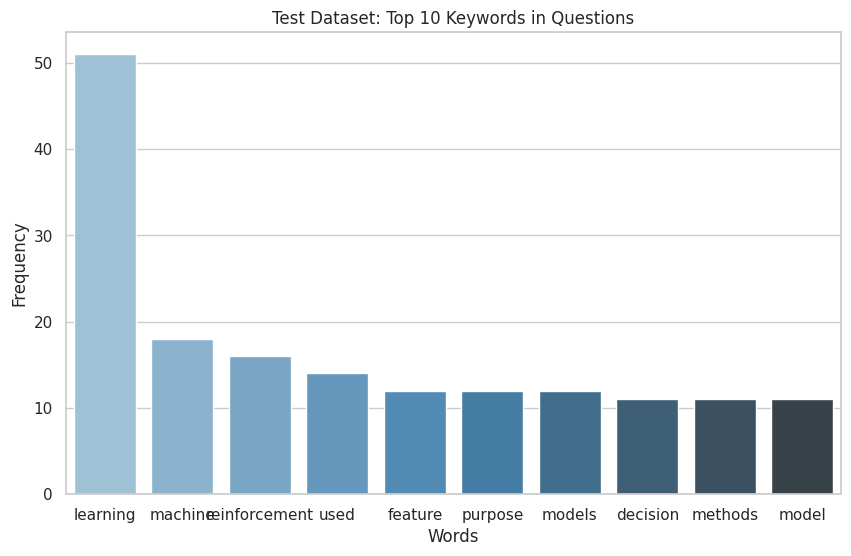

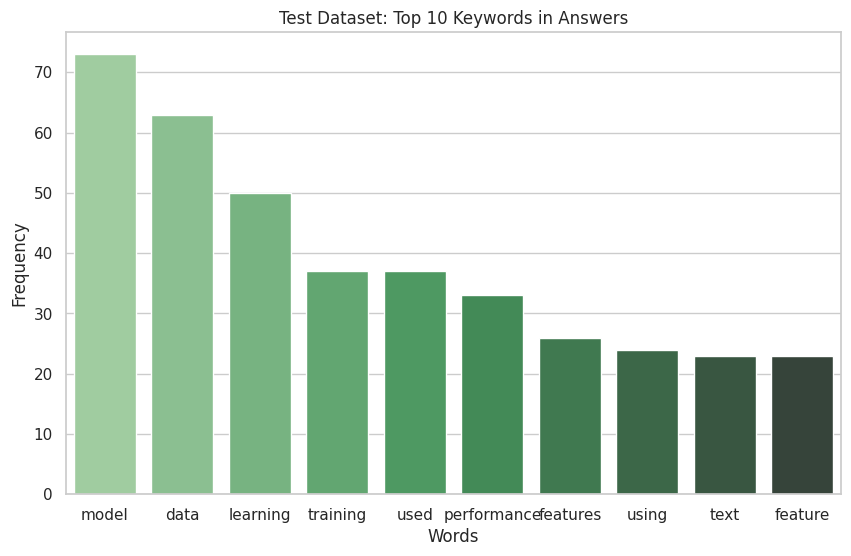

In [30]:
# Repeat similar plots for Dev Dataset
# 1. Question Word Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(dev_df['question_word_count'], bins=10, kde=True, color="blue")
plt.title('Dev Dataset: Distribution of Question Word Count')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# 2. Answer Word Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(dev_df['answer_word_count'], bins=10, kde=True, color="green")
plt.title('Dev Dataset: Distribution of Answer Word Count')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# 3. Top Keywords in Questions
dev_question_words = dev_df['question'].apply(clean_and_tokenize).sum()
dev_question_word_freq = Counter(dev_question_words).most_common(10)

dev_question_word_freq_df = pd.DataFrame(dev_question_word_freq, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=dev_question_word_freq_df, hue='Word', dodge=False, palette='Blues_d')
plt.title('Dev Dataset: Top 10 Keywords in Questions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# 4. Top Keywords in Answers
dev_answer_words = dev_df['answer'].apply(clean_and_tokenize).sum()
dev_answer_word_freq = Counter(dev_answer_words).most_common(10)

dev_answer_word_freq_df = pd.DataFrame(dev_answer_word_freq, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=dev_answer_word_freq_df, hue='Word', dodge=False, palette='Greens_d')
plt.title('Dev Dataset: Top 10 Keywords in Answers')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Repeat similar plots for Test Dataset
# 1. Question Word Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(test_df['question_word_count'], bins=10, kde=True, color="blue")
plt.title('Test Dataset: Distribution of Question Word Count')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# 2. Answer Word Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(test_df['answer_word_count'], bins=10, kde=True, color="green")
plt.title('Test Dataset: Distribution of Answer Word Count')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# 3. Top Keywords in Questions
test_question_words = test_df['question'].apply(clean_and_tokenize).sum()
test_question_word_freq = Counter(test_question_words).most_common(10)

test_question_word_freq_df = pd.DataFrame(test_question_word_freq, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=test_question_word_freq_df, hue='Word', dodge=False, palette='Blues_d')
plt.title('Test Dataset: Top 10 Keywords in Questions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# 4. Top Keywords in Answers
test_answer_words = test_df['answer'].apply(clean_and_tokenize).sum()
test_answer_word_freq = Counter(test_answer_words).most_common(10)

test_answer_word_freq_df = pd.DataFrame(test_answer_word_freq, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Frequency', data=test_answer_word_freq_df, hue='Word', dodge=False, palette='Greens_d')
plt.title('Test Dataset: Top 10 Keywords in Answers')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()